
Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



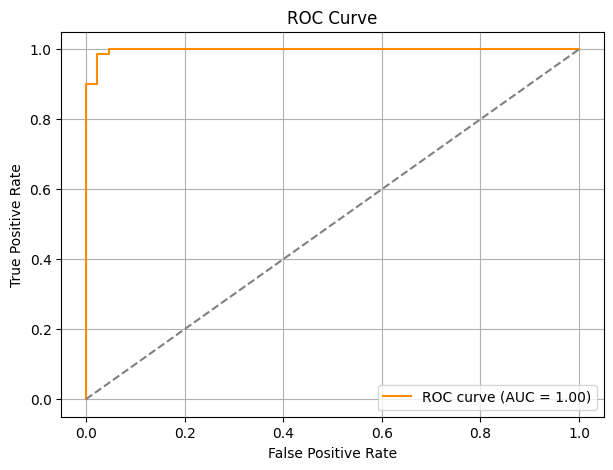


Confusion Matrix at threshold = 0.6:
 [[42  1]
 [ 1 70]]


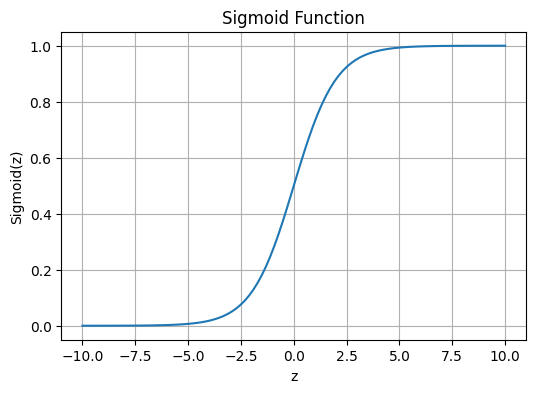

In [2]:
# Task 4: Logistic Regression Binary Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 1. Load a binary classification dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign

# 2. Train/test split and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 5. Threshold tuning
custom_threshold = 0.6
y_custom = (y_prob >= custom_threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_custom)
print(f"\nConfusion Matrix at threshold = {custom_threshold}:\n", cm_custom)

# Sigmoid function illustration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plotting sigmoid curve
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(6, 4))
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()
